# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

# Load the Data

In [2]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [3]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ds.shape

(32561, 15)

# Categorical features

In [5]:
import category_encoders as ce

In [6]:
ds.dtypes[ds.dtypes=='object'].index


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'inc_class'],
      dtype='object')

In [7]:
ce_bin = ce.BinaryEncoder(cols = list(ds.dtypes[ds.dtypes=='object'].index))
ce_bin.fit_transform(ds)

,age,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,fnlwgt,education_0,education_1,education_2,...,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,inc_class_0,inc_class_1
0,39,0,0,0,0,1,77516,0,0,0,...,40,0,0,0,0,0,0,1,0,1
1,50,0,0,0,1,0,83311,0,0,0,...,13,0,0,0,0,0,0,1,0,1
2,38,0,0,0,1,1,215646,0,0,0,...,40,0,0,0,0,0,0,1,0,1
3,53,0,0,0,1,1,234721,0,0,0,...,40,0,0,0,0,0,0,1,0,1
4,28,0,0,0,1,1,338409,0,0,0,...,40,0,0,0,0,0,1,0,0,1
5,37,0,0,0,1,1,284582,0,0,1,...,40,0,0,0,0,0,0,1,0,1
6,49,0,0,0,1,1,160187,0,0,1,...,16,0,0,0,0,0,1,1,0,1
7,52,0,0,0,1,0,209642,0,0,0,...,45,0,0,0,0,0,0,1,1,0
8,31,0,0,0,1,1,45781,0,0,1,...,50,0,0,0,0,0,0,1,1,0
9,42,0,0,0,1,1,159449,0,0,0,...,40,0,0,0,0,0,0,1,1,0


# Algorithms

In [8]:
from sklearn.model_selection import train_test_split

#set x and y
#classification
ds_clf=ds.drop(['inc_class'], axis=1)
#binary encoding
ce_bin = ce.BinaryEncoder(cols = list(ds_clf.dtypes[ds_clf.dtypes=='object'].index))
ds_clf_bin_enc=ce_bin.fit_transform(ds_clf)
y_clf=[0 if ic==' <=50K' else 1 for ic in ds.inc_class]
#Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(ds_clf_bin_enc, y_clf, test_size=0.33, random_state=42)


#regression
ds_reg = ds.drop(['age'], axis=1)
ce_bin = ce.BinaryEncoder(cols = list(ds_reg.dtypes[ds_reg.dtypes=='object'].index))
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(ce_bin.fit_transform(ds_reg), ds.age, test_size=0.33, random_state=42)


In [48]:
X_train_c.shape

(21815, 42)

## Dimensionality reduction

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### PCA

In [10]:
pca = PCA(n_components=2)
x_pca_clf=pca.fit_transform(ds_clf_bin_enc)
X_train_c2D, X_test_c2D, y_train_c2D, y_test_c2D = train_test_split(x_pca_clf, y_clf, test_size=0.33, random_state=42)


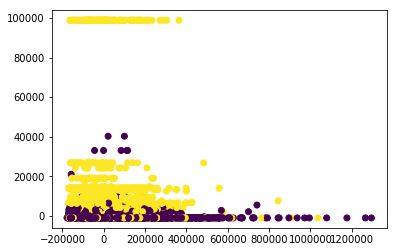

In [11]:
plt.scatter(x_pca_clf[:,0], x_pca_clf[:,1], c=y_clf)

### TSNE

In [12]:
tsne=TSNE(n_components=2)
x_tsne_clf=tsne.fit_transform(ds_clf_bin_enc)
X_train_c2D2, X_test_c2D2, y_train_c2D2, y_test_c2D2 = train_test_split(x_tsne_clf, y_clf, test_size=0.33, random_state=42)

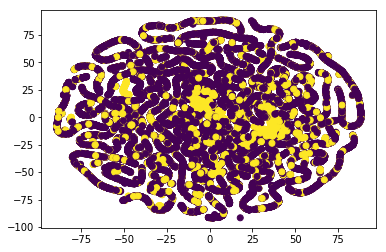

In [13]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], c=y_clf)

## Decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

### Classification

In [37]:
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train_c, y_train_c)

print('Training accuracy:', clf.score(X_train_c, y_train_c))
print('Test accuracy:',clf.score(X_test_c, y_test_c))

Training accuracy: 0.8522117808847124
Test accuracy: 0.852037967615857


In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train_c.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  



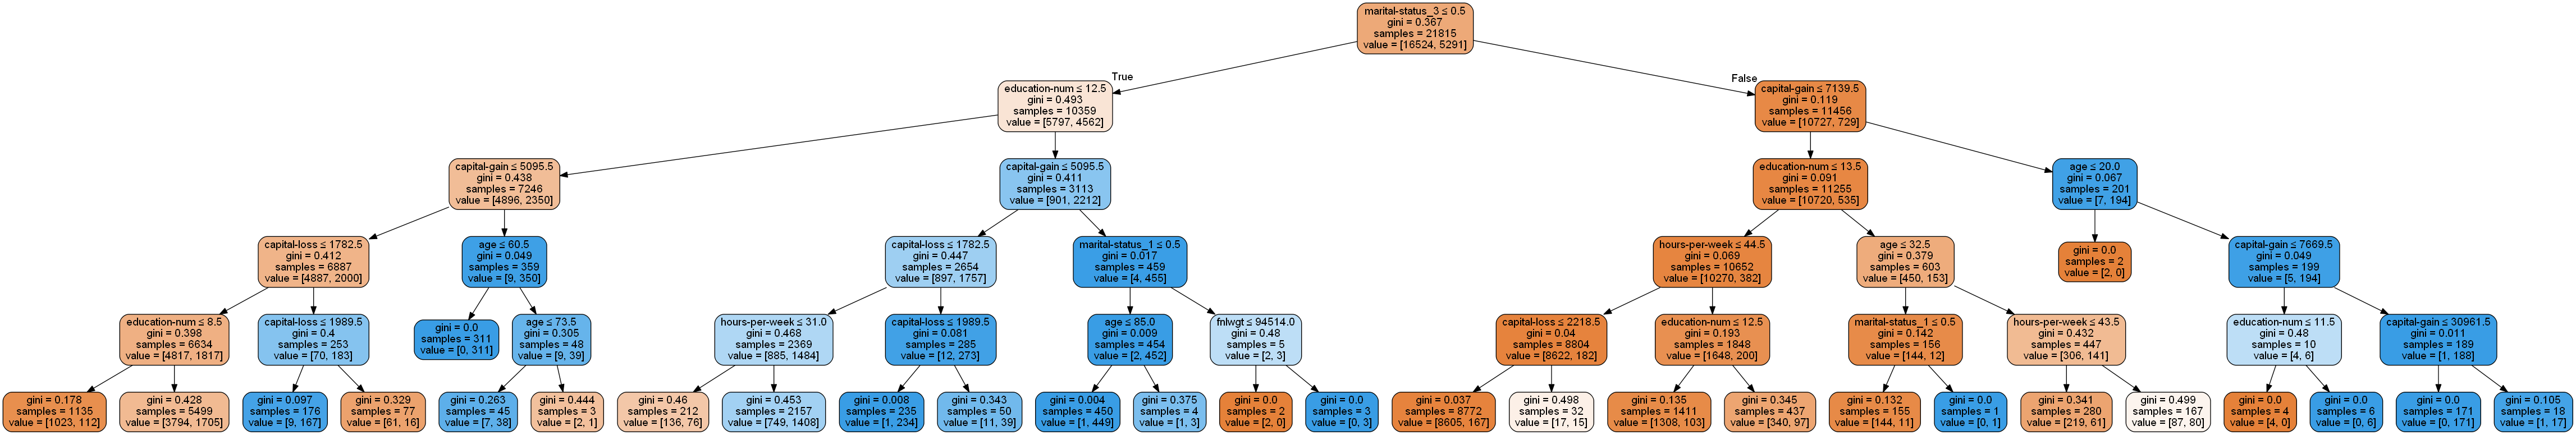

In [40]:
Image(graph.create_png())

You see a decision tree. That is a binary tree where each node represents a portion of the data. Each node that is not a leaf splits its part of the data in two sub-parts. The root node contains all data (from the training set). Futrhermore, this is a classification tree. It predicts class probabilities - the node values.

**Root node:**

- samples = 134 that means the node 'contains' 134 samples. Since it's the root node that means the tree was trained on 134 samples.
- value = [0.373, 0.627] are class probabilities. About 1/3 of the samples belong to class A and 2/3 to class B.
- gini = 0.468 is the gini impurity of the node. It discribes how much the classes are mixed up.
- F5 <= 0.5 What are the column names of the data? Right. This means that the node is split so that all samples where the feature F5 is lower than 0.5 go to the left child and the samples where the feature is higher than 0.5 go to the right child.

**Leaf nodes:**

These nodes are not further split, so there is no need for a F <= something field.
- samples = 90/44 sum to 134. 90 samples went to the left child and 44 samples to the right child.
- values = [0.104, 0.567]/[0.269, 0.06] are the class probabilities in the children. Most samples in the left child belong to class B (0.56 vs 0.10) and most samples in the right child belong to class A (0.27 v 0.06).
- gini = 0.263/0.298 are the remaining impurities in the child nodes. They are lower than in the parent node, which means the split improved separability between the classes, but there is still some uncertainty left.

https://stackoverflow.com/questions/47503575/what-do-the-values-that-graphviz-renders-inside-each-node-of-a-decision-tree-m

In [41]:
with open("DT_vis.png", "wb") as png:
        png.write(graph.create_png())

### Regression

In [16]:
reg=DecisionTreeRegressor(max_depth=5)
reg.fit(X_train_r, y_train_r)

print('Training R2:', reg.score(X_train_r, y_train_r))
print('Test R2:',reg.score(X_test_r, y_test_r))

Training R2: 0.41772052919780134
Test R2: 0.4140397516997396


In [44]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train_r.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

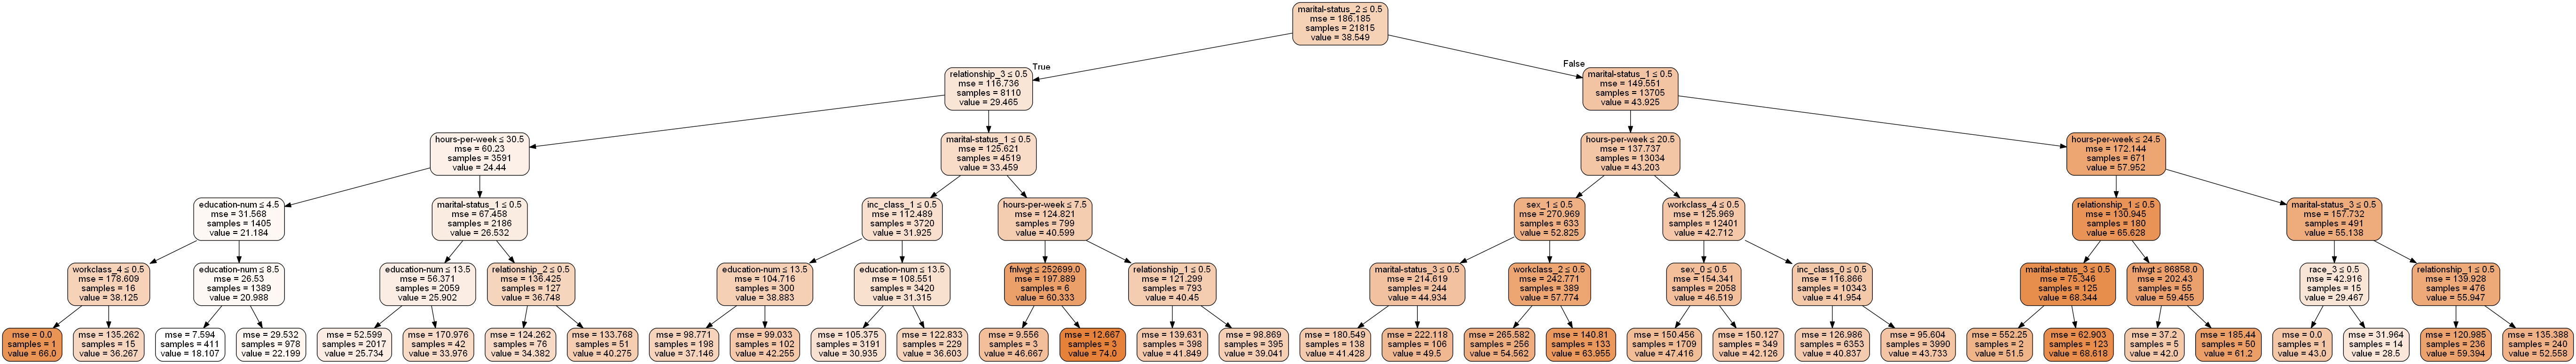

In [45]:
Image(graph.create_png())

In [46]:
with open("DT_vis2.png", "wb") as png:
        png.write(graph.create_png())

## SVM

In [19]:
from sklearn import svm
from sklearn import linear_model

### Classification

In [37]:
#

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
#svc = svm.SVC(kernel='linear', C=C).fit(X_train_c2D, y_train_c2D)
#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train_c2D, y_train_c2D)
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train_c2D, y_train_c2D)
#lin_svc = svm.LinearSVC(C=C, verbose=True, max_iter=100000).fit(X_train_c2D, y_train_c2D)
#print(4)
sgd = linear_model.SGDClassifier(verbose=10, n_jobs=6, max_iter=1000).fit(X_train_c2D2, y_train_c2D2)

-- Epoch 1
Norm: 15.14, NNZs: 2, Bias: -1349.520824, T: 21815, Avg. loss: 1158.401828
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 6.15, NNZs: 2, Bias: -563.610385, T: 43630, Avg. loss: 286.606492
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 10.69, NNZs: 2, Bias: -270.133204, T: 65445, Avg. loss: 145.777568
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 4.58, NNZs: 2, Bias: -166.295718, T: 87260, Avg. loss: 95.891468
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 6.45, NNZs: 2, Bias: -128.955976, T: 109075, Avg. loss: 73.560817
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 2.27, NNZs: 2, Bias: -108.420580, T: 130890, Avg. loss: 60.331165
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 2.95, NNZs: 2, Bias: -94.289789, T: 152705, Avg. loss: 51.199846
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 2.50, NNZs: 2, Bias: -82.129454, T: 174520, Avg. loss: 43.937085
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 5.32, NNZs: 2, Bias: -69.970251, T: 19

Total training time: 0.93 seconds.
-- Epoch 140
Norm: 0.14, NNZs: 2, Bias: -5.221388, T: 3054100, Avg. loss: 2.888411
Total training time: 0.93 seconds.
-- Epoch 141
Norm: 0.10, NNZs: 2, Bias: -5.028874, T: 3075915, Avg. loss: 2.847001
Total training time: 0.94 seconds.
-- Epoch 142
Norm: 0.13, NNZs: 2, Bias: -5.119796, T: 3097730, Avg. loss: 2.905140
Total training time: 0.94 seconds.
-- Epoch 143
Norm: 0.23, NNZs: 2, Bias: -5.327806, T: 3119545, Avg. loss: 2.825845
Total training time: 0.95 seconds.
-- Epoch 144
Norm: 0.29, NNZs: 2, Bias: -5.240561, T: 3141360, Avg. loss: 2.832068
Total training time: 0.96 seconds.
-- Epoch 145
Norm: 0.03, NNZs: 2, Bias: -4.904793, T: 3163175, Avg. loss: 2.784258
Total training time: 0.96 seconds.
-- Epoch 146
Norm: 0.12, NNZs: 2, Bias: -5.116243, T: 3184990, Avg. loss: 2.758330
Total training time: 0.97 seconds.
-- Epoch 147
Norm: 0.14, NNZs: 2, Bias: -4.902904, T: 3206805, Avg. loss: 2.768496
Total training time: 0.98 seconds.
-- Epoch 148
Norm: 0.

Norm: 0.04, NNZs: 2, Bias: -3.077017, T: 6064570, Avg. loss: 1.730794
Total training time: 1.93 seconds.
-- Epoch 279
Norm: 0.08, NNZs: 2, Bias: -3.001355, T: 6086385, Avg. loss: 1.707549
Total training time: 1.93 seconds.
-- Epoch 280
Norm: 0.04, NNZs: 2, Bias: -3.008142, T: 6108200, Avg. loss: 1.701510
Total training time: 1.94 seconds.
-- Epoch 281
Norm: 0.14, NNZs: 2, Bias: -3.039340, T: 6130015, Avg. loss: 1.713118
Total training time: 1.94 seconds.
-- Epoch 282
Norm: 0.00, NNZs: 2, Bias: -3.042579, T: 6151830, Avg. loss: 1.709724
Total training time: 1.95 seconds.
-- Epoch 283
Norm: 0.13, NNZs: 2, Bias: -2.964583, T: 6173645, Avg. loss: 1.680635
Total training time: 1.96 seconds.
-- Epoch 284
Norm: 0.09, NNZs: 2, Bias: -2.942136, T: 6195460, Avg. loss: 1.704009
Total training time: 1.96 seconds.
-- Epoch 285
Norm: 0.12, NNZs: 2, Bias: -2.996880, T: 6217275, Avg. loss: 1.707755
Total training time: 1.97 seconds.
-- Epoch 286
Norm: 0.12, NNZs: 2, Bias: -3.100861, T: 6239090, Avg. l

Norm: 0.03, NNZs: 2, Bias: -2.311853, T: 9075040, Avg. loss: 1.317996
Total training time: 2.93 seconds.
-- Epoch 417
Norm: 0.02, NNZs: 2, Bias: -2.370205, T: 9096855, Avg. loss: 1.327296
Total training time: 2.93 seconds.
-- Epoch 418
Norm: 0.10, NNZs: 2, Bias: -2.307578, T: 9118670, Avg. loss: 1.328957
Total training time: 2.94 seconds.
-- Epoch 419
Norm: 0.06, NNZs: 2, Bias: -2.317535, T: 9140485, Avg. loss: 1.335143
Total training time: 2.94 seconds.
-- Epoch 420
Norm: 0.10, NNZs: 2, Bias: -2.286958, T: 9162300, Avg. loss: 1.321533
Total training time: 2.95 seconds.
-- Epoch 421
Norm: 0.09, NNZs: 2, Bias: -2.294554, T: 9184115, Avg. loss: 1.315546
Total training time: 2.95 seconds.
-- Epoch 422
Norm: 0.05, NNZs: 2, Bias: -2.306560, T: 9205930, Avg. loss: 1.310978
Total training time: 2.96 seconds.
-- Epoch 423
Norm: 0.02, NNZs: 2, Bias: -2.350996, T: 9227745, Avg. loss: 1.323134
Total training time: 2.97 seconds.
-- Epoch 424
Norm: 0.01, NNZs: 2, Bias: -2.396341, T: 9249560, Avg. l

Total training time: 3.92 seconds.
-- Epoch 561
Norm: 0.08, NNZs: 2, Bias: -1.999034, T: 12238215, Avg. loss: 1.127611
Total training time: 3.92 seconds.
-- Epoch 562
Norm: 0.02, NNZs: 2, Bias: -1.986813, T: 12260030, Avg. loss: 1.126868
Total training time: 3.93 seconds.
-- Epoch 563
Norm: 0.08, NNZs: 2, Bias: -1.950111, T: 12281845, Avg. loss: 1.116963
Total training time: 3.93 seconds.
-- Epoch 564
Norm: 0.07, NNZs: 2, Bias: -1.981002, T: 12303660, Avg. loss: 1.117519
Total training time: 3.94 seconds.
-- Epoch 565
Norm: 0.04, NNZs: 2, Bias: -1.972865, T: 12325475, Avg. loss: 1.114927
Total training time: 3.95 seconds.
-- Epoch 566
Norm: 0.03, NNZs: 2, Bias: -1.965604, T: 12347290, Avg. loss: 1.126843
Total training time: 3.95 seconds.
-- Epoch 567
Norm: 0.05, NNZs: 2, Bias: -1.986579, T: 12369105, Avg. loss: 1.115550
Total training time: 3.96 seconds.
-- Epoch 568
Norm: 0.05, NNZs: 2, Bias: -1.963146, T: 12390920, Avg. loss: 1.114995
Total training time: 3.97 seconds.
-- Epoch 569


Total training time: 5.79 seconds.
-- Epoch 837
Norm: 0.03, NNZs: 2, Bias: -1.618682, T: 18259155, Avg. loss: 0.932367
Total training time: 5.80 seconds.
-- Epoch 838
Norm: 0.05, NNZs: 2, Bias: -1.653695, T: 18280970, Avg. loss: 0.931542
Total training time: 5.80 seconds.
-- Epoch 839
Norm: 0.05, NNZs: 2, Bias: -1.638916, T: 18302785, Avg. loss: 0.927454
Total training time: 5.81 seconds.
-- Epoch 840
Norm: 0.01, NNZs: 2, Bias: -1.623635, T: 18324600, Avg. loss: 0.933769
Total training time: 5.82 seconds.
-- Epoch 841
Norm: 0.03, NNZs: 2, Bias: -1.638911, T: 18346415, Avg. loss: 0.926713
Total training time: 5.82 seconds.
-- Epoch 842
Norm: 0.04, NNZs: 2, Bias: -1.635653, T: 18368230, Avg. loss: 0.932688
Total training time: 5.83 seconds.
-- Epoch 843
Norm: 0.10, NNZs: 2, Bias: -1.605748, T: 18390045, Avg. loss: 0.928849
Total training time: 5.83 seconds.
-- Epoch 844
Norm: 0.06, NNZs: 2, Bias: -1.650849, T: 18411860, Avg. loss: 0.934151
Total training time: 5.84 seconds.
-- Epoch 845


In [38]:
print('Linear SVC train/test accuracy score:',  sgd.score(X_train_c2D, y_train_c2D), '/', sgd.score(X_test_c2D, y_test_c2D))

Linear SVC train/test accuracy score: 0.45349530139812055 / 0.45067932253861903


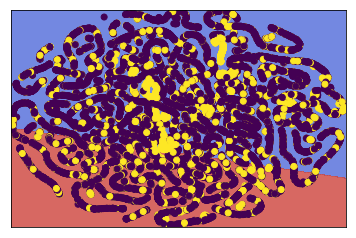

In [40]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_train_c2D2[:, 0].min() - 1, X_train_c2D2[:, 0].max() + 1
y_min, y_max = X_train_c2D2[:, 1].min() - 1, X_train_c2D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = sgd.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_train_c2D2[:, 0], X_train_c2D2[:, 1], c=y_train_c2D2)#, cmap=plt.cm.coolwarm

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
#plt.title(titles[i])

plt.show()

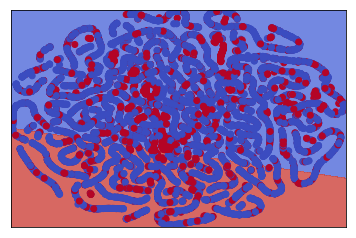

In [41]:
# create a mesh to plot in
x_min, x_max = X_test_c2D2[:, 0].min() - 1, X_test_c2D2[:, 0].max() + 1
y_min, y_max = X_test_c2D2[:, 1].min() - 1, X_test_c2D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = sgd.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_test_c2D2[:, 0], X_test_c2D2[:, 1], c=y_test_c2D2, cmap=plt.cm.coolwarm)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
#plt.title(titles[i])

plt.show()

## K-nearest neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
neigh = KNeighborsClassifier(n_neighbors=7, n_jobs=6)
neigh.fit(X_train_c2D2, y_train_c2D2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=6, n_neighbors=7, p=2,
           weights='uniform')

In [47]:
print('5-nearest neighbors model train/test accuracy score:', neigh.score(X_train_c2D2, y_train_c2D2),'/', neigh.score(X_test_c2D2, y_test_c2D2))

5-nearest neighbors model train/test accuracy score: 0.8152647261058904 / 0.7827098455239159


## Bayesian

In [14]:
from sklearn.naive_bayes import GaussianNB

In [26]:
gnb = GaussianNB(priors=[0.7574604629841852,1-0.7574604629841852]).fit(X_train_c2D2, y_train_c2D2)

In [27]:
print('Naive Bayes model train/test accuracy score:', gnb.score(X_train_c2D2, y_train_c2D2),'/', gnb.score(X_test_c2D2, y_test_c2D2))

Naive Bayes model train/test accuracy score: 0.7574604629841852 / 0.7627024008933556


In [25]:
y_train_c.count(0)/len(y_train_c)

0.7574604629841852

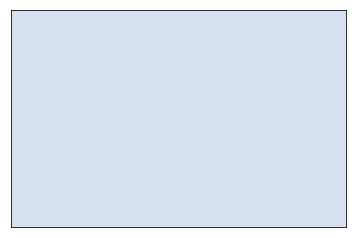

In [22]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_train_c2D2[:, 0].min() - 1, X_train_c2D2[:, 0].max() + 1
y_min, y_max = X_train_c2D2[:, 1].min() - 1, X_train_c2D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X_train_c2D2[:, 0], X_train_c2D2[:, 1], c=y_train_c2D2)#, cmap=plt.cm.coolwarm

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
#plt.title(titles[i])

plt.show()

In [17]:
gnb = GaussianNB().fit(X_train_c, y_train_c)

In [18]:
print('Naive Bayes model train/test accuracy score:', gnb.score(X_train_c, y_train_c),'/', gnb.score(X_test_c, y_test_c))

Naive Bayes model train/test accuracy score: 0.7924363969745588 / 0.7994602642843849


In [35]:
from sklearn.naive_bayes import BernoulliNB

In [37]:
bnb = BernoulliNB().fit(X_train_c2D, y_train_c2D)
print('Naive Bayes model train/test accuracy score:', bnb.score(X_train_c2D, y_train_c2D),'/',bnb.score(X_test_c2D, y_test_c2D))

Naive Bayes model train/test accuracy score: 0.7796928718771488 / 0.7847571189279732
